<a href="https://colab.research.google.com/github/KumarAditya29/New/blob/main/SDG%20vs%20Adam%20optimizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Training with SGD Optimizer:
Epoch 1/50 - SGD Loss: 1.1420 - Val Loss: 0.8533
Epoch 6/50 - SGD Loss: 0.9809 - Val Loss: 0.7965
Epoch 11/50 - SGD Loss: 0.9438 - Val Loss: 0.7945
Epoch 16/50 - SGD Loss: 0.9189 - Val Loss: 0.7956

Training with Adam Optimizer:
Epoch 1/50 - Adam Loss: 1.1714 - Val Loss: 0.8181
Epoch 6/50 - Adam Loss: 0.9429 - Val Loss: 0.7769
Epoch 11/50 - Adam Loss: 0.8950 - Val Loss: 0.7914


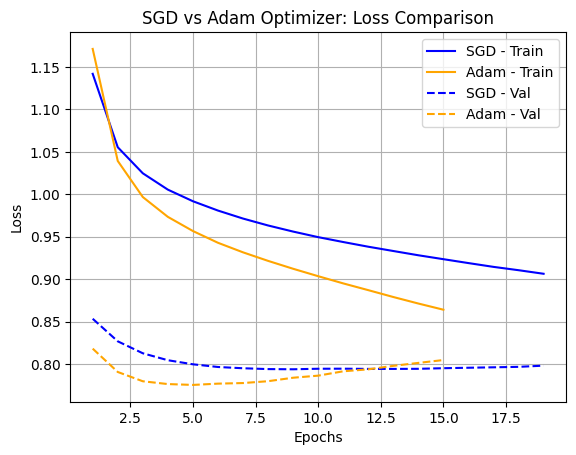

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers, callbacks
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)
tf.random.set_seed(42)

def create_data():
    X = np.random.randn(1000, 10)
    y = np.random.randn(1000, 1)
    return X, y

def create_model():
    model = models.Sequential([
        layers.Dense(50, activation='relu', input_shape=(10,)),
        layers.Dense(20, activation='relu'),
        layers.Dense(1)
    ])
    return model

def train_model(model, optimizer, X, y, batch_size, epochs, optimizer_name):
    model.compile(optimizer=optimizer, loss='mean_squared_error')
    early_stopping = callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

    history = model.fit(
        X, y, batch_size=batch_size, epochs=epochs, verbose=0,
        validation_split=0.2, callbacks=[early_stopping]
    )

    for epoch in range(0, len(history.history['loss']), 5):
        print(f"Epoch {epoch+1}/{epochs} - {optimizer_name} Loss: {history.history['loss'][epoch]:.4f} - Val Loss: {history.history['val_loss'][epoch]:.4f}")

    return history.history

def plot_loss(epochs, sgd_loss, adam_loss):
    plt.plot(range(1, len(sgd_loss['loss']) + 1), sgd_loss['loss'], label='SGD - Train', color='blue')
    plt.plot(range(1, len(adam_loss['loss']) + 1), adam_loss['loss'], label='Adam - Train', color='orange')
    plt.plot(range(1, len(sgd_loss['val_loss']) + 1), sgd_loss['val_loss'], '--', label='SGD - Val', color='blue')
    plt.plot(range(1, len(adam_loss['val_loss']) + 1), adam_loss['val_loss'], '--', label='Adam - Val', color='orange')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('SGD vs Adam Optimizer: Loss Comparison')
    plt.legend()
    plt.grid(True)
    plt.show()

X, y = create_data()
model_sgd = create_model()
model_adam = create_model()

optimizer_sgd = optimizers.SGD(learning_rate=0.01)
optimizer_adam = optimizers.Adam(learning_rate=0.001)

epochs = 50
batch_size = 32

print("\nTraining with SGD Optimizer:")
sgd_loss = train_model(model_sgd, optimizer_sgd, X, y, batch_size, epochs, 'SGD')

print("\nTraining with Adam Optimizer:")
adam_loss = train_model(model_adam, optimizer_adam, X, y, batch_size, epochs, 'Adam')

plot_loss(epochs, sgd_loss, adam_loss)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


938/938 ━━━━━━━━━━━━━━━━━━━━ 44s 46ms/step - accuracy: 0.7786 - loss: 0.6701 - val_accuracy: 0.9841 - val_loss: 0.0486
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 80s 44ms/step - accuracy: 0.9656 - loss: 0.1107 - val_accuracy: 0.9861 - val_loss: 0.0408
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 42s 45ms/step - accuracy: 0.9760 - loss: 0.0781 - val_accuracy: 0.9900 - val_loss: 0.0317
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 42s 44ms/step - accuracy: 0.9796 - loss: 0.0668 - val_accuracy: 0.9890 - val_loss: 0.0333
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 81s 44ms/step - accuracy: 0.9825 - loss: 0.0546 - val_accuracy: 0.9925 - val_loss: 0.0235
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 42s 44ms/step - accuracy: 0.9852 - loss: 0.0471 - val_accuracy: 0.9906 - val_loss: 0.0280
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 41s 43ms/step - accuracy: 0.9879 - loss: 0.0403 - val_accuracy: 0.9920 - val_loss: 0.0254
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 41s 44ms/step - accuracy: 0.9879 - loss: 0.0398 - val_accurac

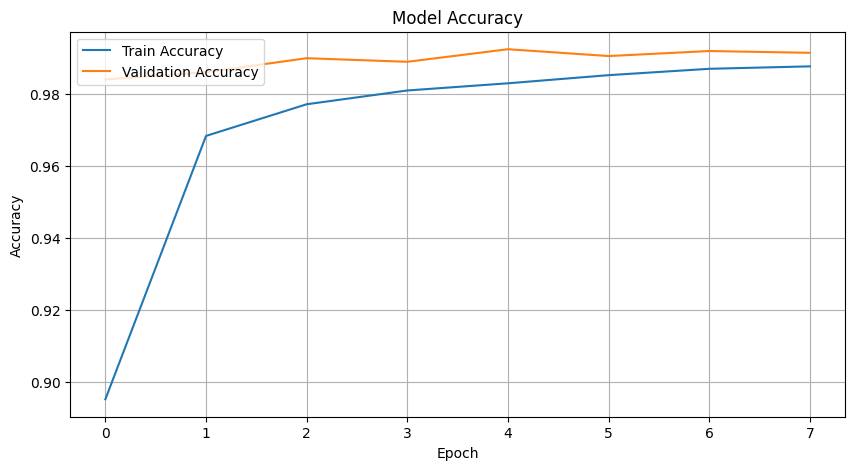

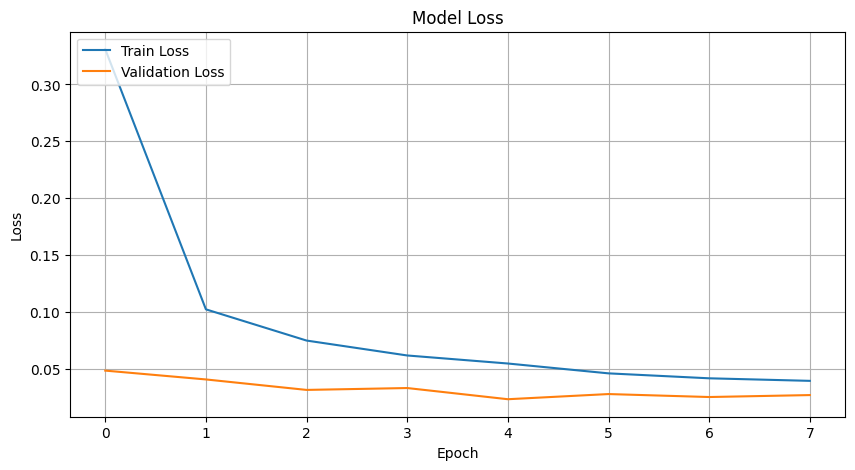

In [2]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models, callbacks
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(42)
tf.random.set_seed(42)

def load_and_prepare_data():
    (train_imgs, train_labels), (test_imgs, test_labels) = datasets.mnist.load_data()
    train_imgs = train_imgs.reshape((train_imgs.shape[0], 28, 28, 1)).astype('float32') / 255
    test_imgs = test_imgs.reshape((test_imgs.shape[0], 28, 28, 1)).astype('float32') / 255
    return train_imgs, train_labels, test_imgs, test_labels

def create_model():
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.Flatten(),
        layers.Dense(64, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])
    return model

def train_model(model, train_imgs, train_labels, test_imgs, test_labels, epochs=10, batch_size=32):
    data_augmentation = tf.keras.preprocessing.image.ImageDataGenerator(
        rotation_range=10,
        width_shift_range=0.1,
        height_shift_range=0.1
    )

    early_stopping = callbacks.EarlyStopping(monitor='val_accuracy', patience=3, restore_best_weights=True)

    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    history = model.fit(
        data_augmentation.flow(train_imgs, train_labels, batch_size=batch_size),
        epochs=epochs,
        validation_data=(test_imgs, test_labels),
        callbacks=[early_stopping]
    )
    return history

def plot_metrics(history):
    plt.figure(figsize=(10, 5))
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(loc='upper left')
    plt.grid(True)
    plt.show()

    plt.figure(figsize=(10, 5))
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(loc='upper left')
    plt.grid(True)
    plt.show()

train_imgs, train_labels, test_imgs, test_labels = load_and_prepare_data()

model = create_model()
history = train_model(model, train_imgs, train_labels, test_imgs, test_labels, epochs=10, batch_size=64)

test_loss, test_acc = model.evaluate(test_imgs, test_labels, verbose=2)
print(f'Test Accuracy: {test_acc:.4f}')
print(f'Test Loss: {test_loss:.4f}')

plot_metrics(history)